# Visualizing data with Python

## Creating pictures from data

A picture is worth a thousand words. This is particularly true for large,
complex, multi-dimensional data that cannot speak for itself. Visualizing data
and looking at it is a very important part of (data) science. Becoming a skilled
data analyst entails the ability to manipulate and extract particular bits of
data, but also the ability to quickly and effectively visualize large amounts of
data to uncover patterns and find discrepancies. Data visualization is also a
key element in communicating about data: reporting results compellingly and
telling a coherent story. This chapter will show you how to visualize data for
exploration, as well as how to create beautiful visualizations for the communication of results with others.

### Introducing Matplotlib

There are a few different Python software libraries that visualize data. We'll
start with a library called [Matplotlib](https://matplotlib.org). This library
was first developed almost 20 years ago by John Hunter, while was doing a
postdoc in neuroscience at the University of Chicago. He needed a way to
visualize time series from brain recordings that he was analyzing and, irked by
the need to have a license installed on multiple different computers, he decided
that instead of using the proprietary tools that were available at the time, he
would develop an open-source alternative. The library grew, initially with only
John working on it, but eventually with many others joining him. It is now very
widely used by scientists and engineers in many different fields and has been
used to visualize data ranging from NASA's Mars landings to Nobel-prize-winning
research on gravitational waves. And of course -- it is still used to visualize
neuroscience data. One of the nice things about Matplotlib is that it gives you
a lot of control over the appearance of your visualizations, and fine-grained
control over the elements of the visualization. We'll get to that. But let's
start with some basics.

Matplotlib is a large and complex software library, and there are several
different application programming interfaces (APIs) that you can use to write
your visualizations. However, we strongly believe that there is one that you
should almost always use and which gives you the most control over your
visualizations. This API defines objects in Python that represent the core
elements of the visualization and allows you to activate different kinds of
visualizations and manipulate their attributes through calls to methods of
these objects. This API is implemented in the `pyplot` sub-library, which we
import as `plt` (another oft-used convention, similar to `import pandas as pd`
and `import numpy as np`.)

In [1]:
import matplotlib.pyplot as plt

The first function that we will use here is `plt.subplots`. This creates the
graphic elements that will constitute our data visualization.

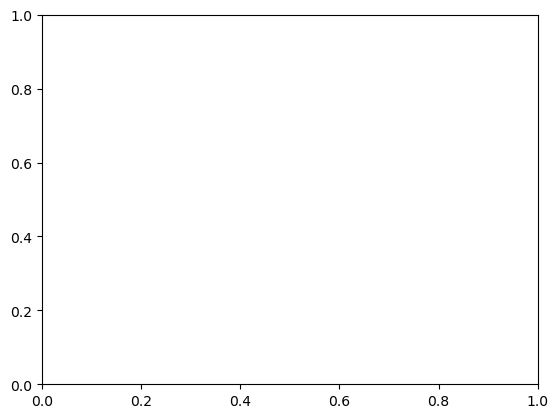

In [2]:
fig, ax = plt.subplots()

In its simplest form, the `subplots` function is called with no arguments. This
returns two objects. A `Figure` object, which we named `fig`, and an `Axes`
object, which we named `ax`. The `Axes` object is the element that will hold the
data: you can think of it as the canvas that we will draw on with data. The
`Figure` object, on the other hand, is more like the page onto which the `Axes`
object is placed. It is a container that can hold several of the `Axes` objects
-- we'll see that a bit later on -- and can be used to access these objects and
also to lay them out on the page or in a file that we save to disk.

To add data to the `Axes`, we call methods of the `Axes` object. For example,
let's plot a simple sequence of data. These data are from the classic
experiments of Harry Harlow's 1949 paper ["The formation of learning sets"](https://doi.org/10.1037/h0062474). 
In this experiment, animals were asked to choose between two options. In each 
block of trials, one of these options was rewarded with a tasty treat, while 
the other one was not. Here is the data from the first block of trials, a block
of trials about midway through the experiment, and the last block of trials:

In [3]:
trial = [1, 2, 3, 4, 5, 6]
first_block = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
middle_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
last_block = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

As you can see by reading off the numbers, the first trial in each block of the
experiment had an average performance of 50%. This is because, at that point in
the experiment, the animals had no way of knowing which of the two options would
be rewarded. After this initial attempt, they could start learning from their
experience and their performance eventually improved. But remarkably, in the first
block, improvement is gradual, with the animals struggling to get to a
reasonable performance on the task, while in the last session, the animals
improve almost immediately. In the middle blocks, improvement was neither as bad as
in the initial few trials, nor as good as in the last block. This led Harlow to
propose that animals are learning something about the context and to propose the
(at the time) revolutionary concept of a "learning set" that animals are using
in "learning to learn". Now, while this word description of the data is OK,
looking at a visual of this data might be more illuminating. Let's replicate
the graphic of Figure 2 from Harlow's classic paper.

In this case, we will use the `ax.plot` method:

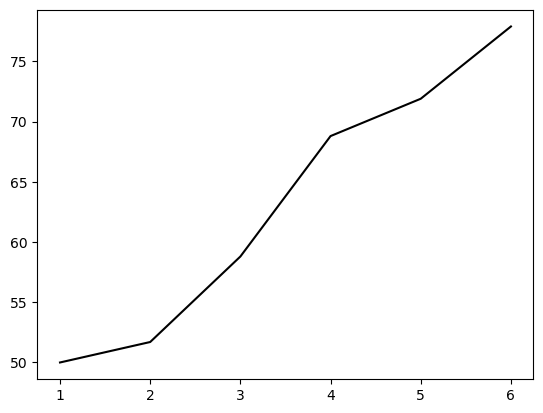

In [4]:
fig, ax = plt.subplots()
plot = ax.plot(trial, first_block, color = "black")

Calling `ax.plot` adds a line to the plot. The horizontal ('x', or abscissa)
axis of the plot represents the trials within the block, and the height of the
line at each point on the vertical ('y', or ordinate) dimension represents the
average percent correct responses in that trial. Adding these data as a line
shows the gradual learning that occurs in the first set of trials.

If you'd like, you can add more data to the plot. For example, let's consider
how you would add the other blocks.

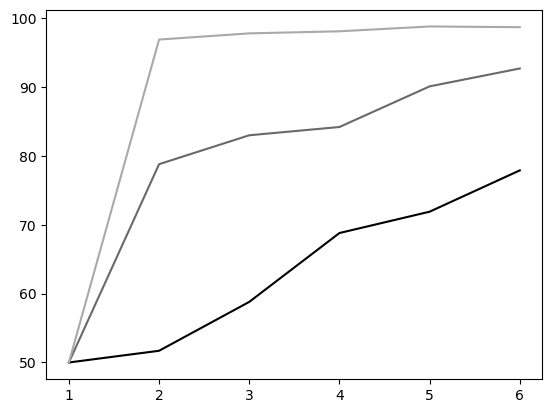

In [5]:
fig, ax = plt.subplots()
ax.plot(trial, first_block, color = "black")
ax.plot(trial, middle_block, color = "dimgray")
p = ax.plot(trial, last_block, color = "darkgray")

This visualization makes the phenomenon of "learning to learn" quite apparent.
Something is very different about the first block of trials (in blue), the
middle block (orange), and the last block (green). It seems as though the animal
has learned that one stimulus is always going to be rewarding within a block and
learns to shift to the rewarded stimulus more quickly as the experiment wears
on.

But this visualization is still pretty basic and we still need to use a lot of
words to explain what we are looking at. To better describe the data visually,
we can add annotations to the plots. First, we'd like to mark which line came
from which data. This can be done by adding a label to each line as we add it to
the plot and then calling `ax.legend()` to add a legend with these labels.

We would also like to add labels to the axes so that it is immediately apparent
what is being represented. We can do that using the `set_xlabel` and
`set_ylabel` methods of the `Axes` object.

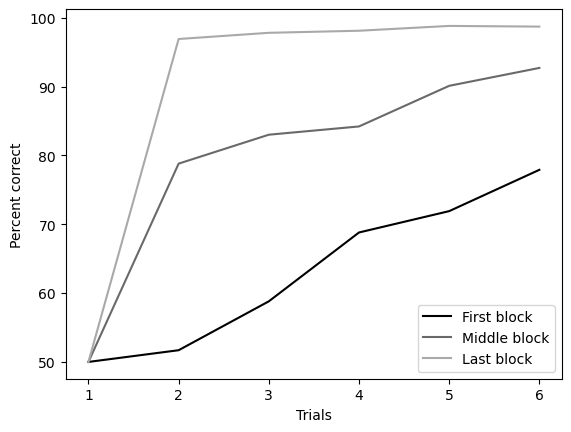

In [6]:
fig, ax = plt.subplots()
ax.plot(trial, first_block, color = "black", label="First block")
ax.plot(trial, middle_block, color = "dimgray", label="Middle block")
ax.plot(trial, last_block, color = "darkgray", label="Last block")
ax.legend()

ax.set_xlabel("Trials")
label = ax.set_ylabel("Percent correct")

There is still more customization that we can do here before we are done. One
thing that is a bit misleading about this way of showing the data is that it
appears to be continuous. Because the `plot` function defaults to show lines
with no markings indicating when the measurements were taken, it looks almost as
though measurements were done between the trials in each block. We can improve
this visualization by adding markers. We choose a different marker for each one
of the variables. These are added as keyword arguments to the call to `plot`.
We will also specify a `linestyle` keyword argument that will modify the
appearance of the lines. In this case, it seems appropriate to choose a dashed
line, defined by setting `linestyle='--'`. Finally, using a method of the
`Figure` object, we can also add a title.

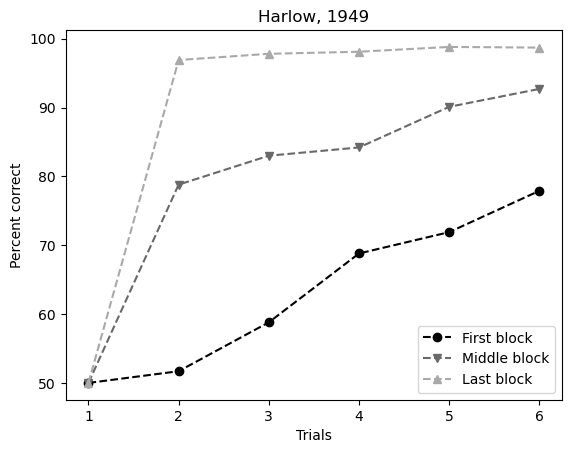

In [7]:
fig, ax = plt.subplots()
ax.plot(trial, first_block, color = "black", marker='o', linestyle='--', label="First block")
ax.plot(trial, middle_block, color = "dimgray", marker='v', linestyle='--', label="Middle block")
ax.plot(trial, last_block, color = "darkgray", marker='^', linestyle='--', label="Last block")

ax.set_xlabel("Trials")
ax.set_ylabel("Percent correct")
ax.legend()
title = ax.set_title("Harlow, 1949")

There -- this plot tells the story we wanted to tell very clearly.

#### Exercise

The `plot` method has multiple other keyword arguments to control the appearance of its results. For example, the `color` keyword argument controls the color of the lines. One way to specify the color of each line is by using a string that is one of the named colors specified in [the Matplotlib documentation](https://matplotlib.org/stable/gallery/color/named_colors.html). Use this keyword argument to make the three lines in the plot more distinguishable from each other using colors that you find pleasing.

### Small multiples

What if the data becomes much more complicated? For example, if there is too
much to fit into just one plot? In `pandas`, we saw how to join, and
then slice and dice a dataset that contains measurements of diffusion MRI from
the brains of 77 subjects. We already saw there that we can visualize the data
with line plots of the fractional anisotropy (FA) of different groups within the
data, and we demonstrated this with just one of the 20 tracts. Now, we'd like to
look at several of the tracts. We can load the data with `pandas`. 

In [8]:
import pandas as pd

df = pd.read_csv("./data/visualization.csv", index_col = 0)
df

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10,tractID,nodeID,fa
subjectID,,,,,,,,,,
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,0,0.199144
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,1,0.253789
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,2,0.300039
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,3,0.330740
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,4,0.357632
...,...,...,...,...,...,...,...,...,...,...
subject_076,17,Male,Right,121.0,59.0,65.0,False,Right Arcuate,95,0.344533
subject_076,17,Male,Right,121.0,59.0,65.0,False,Right Arcuate,96,0.318390
subject_076,17,Male,Right,121.0,59.0,65.0,False,Right Arcuate,97,0.285579


In [9]:
age_groups = df.groupby(["age_less_than_10", "tractID", "nodeID"])
younger_fa = age_groups.mean(numeric_only = True).loc[True, "fa"]
older_fa   = age_groups.mean(numeric_only = True).loc[False, "fa"]
tracts     = df["tractID"].unique()

We divided the sample into two groups:
participants over the age of 10 and participants under the age of 10. Based on
this division, the first two variables, `younger_fa` and `older_fa` contain
Pandas DataFrame objects that hold the average diffusion fractional anistropy in
each node along the length of 20 different brain white matter pathways for each
one of these groups. The `tracts` variable is a Pandas `Series` object that
holds the names of the different pathways (e.g., "Left Corticospinal", "Right
Corticospinal", etc.).

One way to plot all of this data is to iterate over the names of the pathways
and, in each iteration, add the data for one of the tracts into the plot. We
will always use the same color for all of the curves derived from the young
people (`black`) and older people (`darkgray`).

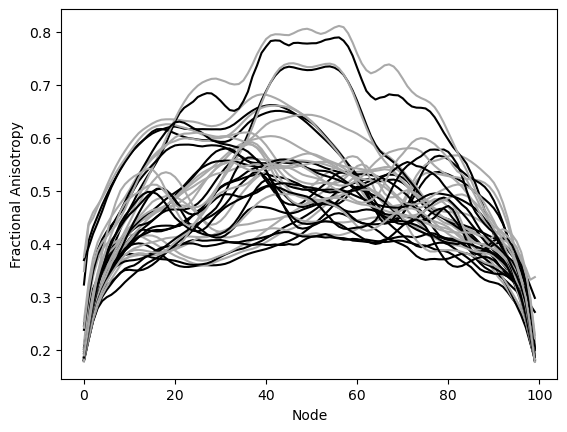

In [10]:
fig, ax = plt.subplots()
for tract in tracts:
    ax.plot(younger_fa[tract], color="black")
    ax.plot(older_fa[tract], color="darkgray")
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional Anisotropy")

It's hard to make anything out of this visualization. For example, it's really
hard to distinguish which data comes from which brain pathway and to match the
two different lines -- one for young subjects and the other for older subjects
-- that were derived from each of the pathways. This makes it hard to make out
the patterns in this data. For example, it looks like maybe in some cases there
is a difference between younger and older participants, but how would we tell in
which pathways these differences are most pronounced?

One way to deal with this is to separate the plots so that the data from each
tract has its own set of axes. We could do this by initializing a separate
`Figure` object for each tract, but we can also do this by using different
*subplots*. These are different parts of the same `Figure` object that each has
its own set of axes. The `subplots` function that you saw before takes as inputs
the number of subplots that you would like your figure to have. In its simplest
form, we can give it an integer and it would give us a sequence of `Axes`
objects, with each subplot taking up a row in the figure. Since both subplots
have the same x-axis, we label the axis only in the bottom subplot.

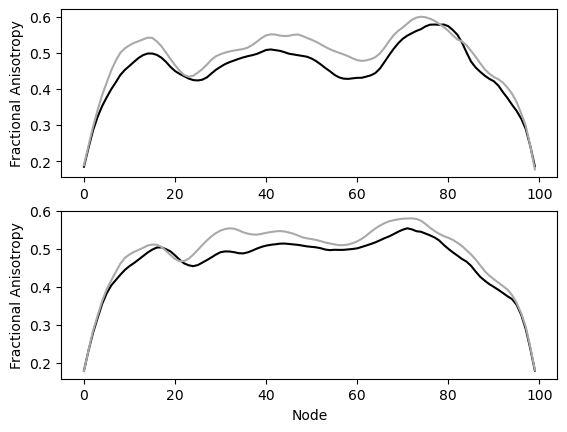

In [11]:
fig, [ax1, ax2] = plt.subplots(2)
ax1.plot(younger_fa["Right Arcuate"], color = "black")
ax1.plot(older_fa["Right Arcuate"], color = "darkgray")
ax2.plot(younger_fa["Left Arcuate"], color = "black")
ax2.plot(older_fa["Left Arcuate"], color = "darkgray")
ax2.set_ylabel("Fractional Anisotropy")
ax1.set_ylabel("Fractional Anisotropy")
label = ax2.set_xlabel("Node")

To make this a bit more elaborate, we can give `subplots` two numbers as inputs.
The first number determines the number of rows of subplots and the second number
determines the number of columns of plots. For example, if we want to fit all of
the pathways into one figure, we can ask for 5 rows of subplots and in each row
to have four subplots (for a total of 5 times 4 = 20 subplots). Then, in each
subplot, we can use the data only for that particular pathway. To make things
less cluttered, after adding a small title for each subplot, we will also remove
the axis in each plot and use the `set_layout_tight` method of the figure
object, so that each one of the subplots is comfortably laid out within the
confines of the figure. Finally, to fit all this in one figure, we can also make
the figure slightly larger.

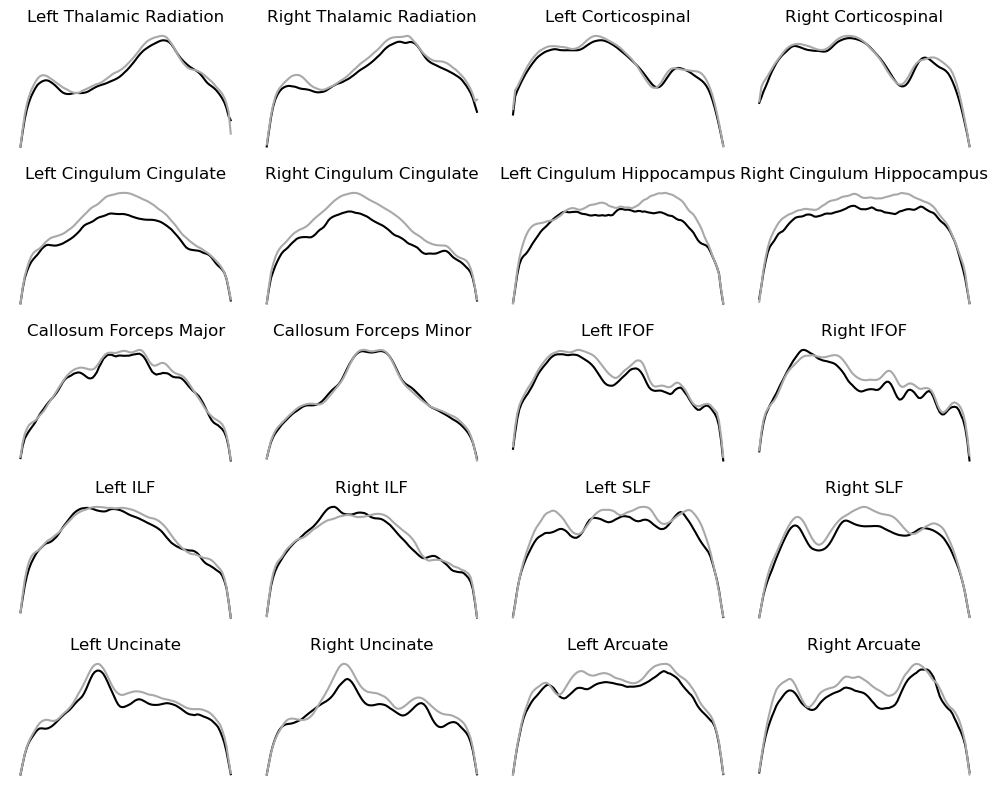

In [12]:
fig, ax = plt.subplots(5, 4)
for tract_idx in range(20):
    pathway = tracts[tract_idx]
    ax.flat[tract_idx].plot(younger_fa[pathway], color="black")
    ax.flat[tract_idx].plot(older_fa[pathway], color="darkgray")
    ax.flat[tract_idx].set_title(pathway)
    ax.flat[tract_idx].axis("off")

fig.set_tight_layout("tight")
fig.set_size_inches([10, 8])

Repeating the same pattern multiple times for different data that have the same
basic structure can be quite informative and is sometimes referred to as a set
of "small multiples". For example, small multiples are sometimes used to
describe multiple time series of stock prices or temperatures over time in
multiple different cities. Here, it teaches us that some brain pathways tend to
change between the younger and older participants, while others change less.
Laying the curves out in this way also shows us the symmetry of pathways in the
two hemispheres. Because we've removed the axes, we cannot directly compare the
values between pathways, though.

#### Exercise

The `Axes` objects have `set_ylim()` and `set_xlim()` methods, which set the limits of each of the dimensions of the plot. They take a list of two values for the minimal value of the range. To facilitate comparisons between tracts, use the `set_ylim` method to set the range of the FA values in each of the plots so that they are the same in all of the plots. To make sure that the code you write provides the appropriate range in all of the subplots, you will need to start by figuring out what are the maximal and minimal values of FA in the entire dataset.

## Scatter plots

Another way to compare datasets uses scatter plots. A scatter plot contains
points that are placed into the axes so that the position of each marker on one
axis (e.g., the abscissa) corresponds to a value in one variable and the
position on the other axis (e.g., the ordinate) corresponds to the value in
another variable. The scatter plot lets us compare these two values to each
other directly, and also allows us to see the patterns overall. For example, in
our case, each point in the plot could represent one of the tracts. The position
of the marker on the abscissa could be used to represent the average value of
the FA in this tract in the younger subjects, while the position of this same
marker on the ordinate is used to represent the average FA in this tract in the
older subjects.

One way to see whether the values are systematically different is to add the y=x
line to the plot. Here, this is done by plotting a dashed line between x=0.3,
y=0.3 and x=0.7, y=0.7:

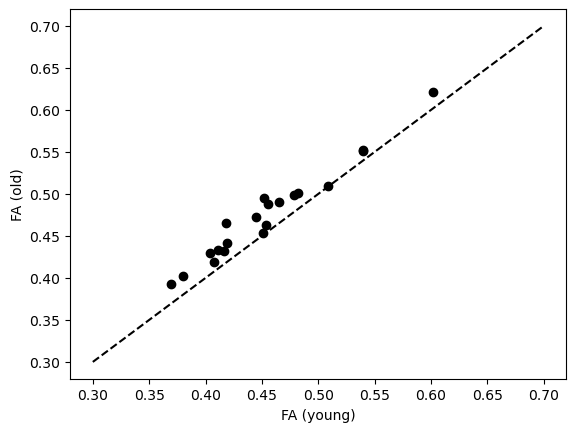

In [13]:
fig, ax = plt.subplots()

ax.scatter(younger_fa.groupby("tractID").mean(),
           older_fa.groupby("tractID").mean(), 
           color = "black")

ax.plot([0.3, 0.7], [0.3, 0.7], color = "black", linestyle='--')
ax.set_xlabel("FA (young)")
label = ax.set_ylabel("FA (old)")

We learn a few different things from this visualization: First, we see that the average FA varies quite a bit between the different tracts and that the way that this varies in young people closely tracks the way that it varies in older individuals. That is why points that have a higher x value, also tend to have a higher y value. In addition, there is also a systematic shift. For almost all of the tracts, the x value is slightly lower than the y value, and the markers lie above the equality line. This indicates that the average FA for the tracts is almost always higher in older individuals than in younger individuals. We saw this pattern in the small multiples above, but this plot demonstrates how persistent this pattern is and how consistent its size is, despite large differences in the values of FA in different tracts. This is another way to summarize and visualize the data that may make the point.


## Statistical visualizations

Statistical visualizations are used to make inferences about the data or
comparisons between different data. To create statistical visualizations, we
will rely on the [Seaborn library](https://seaborn.pydata.org/). This library
puts together the power of Pandas with the flexibility of Matplotlib. It was
created by Michael Waskom, while he was a graduate student in neuroscience at
Stanford. Initially, he used it for his research purposes, but he made it
publicly available and it quickly became very popular among data scientists. This
is because it makes it easy to create very elegant statistical visualizations
with just a bit of code.

To demonstrate what we mean by statistical visualizations, we will turn to look
at the table that contains the properties of the subjects from the above.

In [14]:
import seaborn as sns

subjects = df.drop_duplicates(["Age", "Gender", "Handedness", "IQ", "IQ_Matrix", "IQ_Vocab"])

First, let's draw comparisons of IQ between people with different handedness and
gender. We will use a bar chart for that. This chart draws bars whose height
signifies the average value of a variable among a group of observations. The
color of the bar and its position may signify the group to which this bar
belongs. Here, we'll use both. We'll use the x-axis to split the data into
right-handed and left-handed individuals and we'll use the color of the bar
(more technically accurately referred to as "hue") to split the data into
male-identified and female-identified individuals:

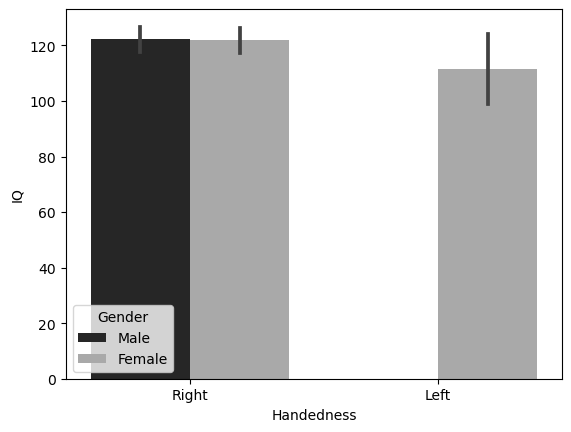

In [15]:
b = sns.barplot(data=subjects, x="Handedness", y="IQ", hue="Gender", palette = "dark:darkgray")

That's it! Just one line of code. Seaborn takes advantage of the information
provided in the Pandas DataFrame object itself to infer how this table should be
split up and how to label the axes and create the legend. In addition to
drawing the average of each group as the height of the bar, Seaborn adds error
bars -- the vertical lines at the top of each bar -- that bound the 95%
confidence interval of the values in the bar. These are computed under the hood
using a procedure called bootstrapping, where the data are randomly resampled
multiple times to assess how variable the average is. In this case, there are no
left-handed males, so that bar remains absent.

Bar charts are mostly OK, especially if you don't truncate the y-axis to
exaggerate the size of small effects, and if the mean is further contextualized
using error bars that provide information about the variability of the average
quantity. But the truth is that bar charts also leave a lot to be desired. A
classical demonstration of the issues with displaying only the mean and error of
the data is in the so-called Anscombe's quartet. These are four sets of data
that were cooked up by the statistician Francis Anscombe so that they each have
the same mean, the same variance, and even the same correlation between the two
variables that comprise each dataset. This means that the bar charts
representing each of these datasets would be identical, even while the
underlying data have quite different interpretations.

There are better ways to display data. Seaborn implements several different
kinds of visualizations that provide even more information about the data. It
also provides a variety of options for each visualization. For example, one way
to deal with the limitations of the bar chart is to show every observation
within a group of observations, in what is called a "swarmplot". The same data,
including the full distribution, can be visualized as a smoothed silhouette. This
is called a "violin plot".

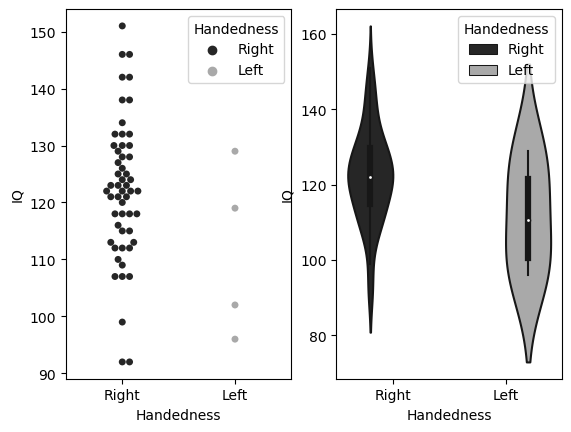

In [16]:
fig, ax = plt.subplots(1, 2)
g = sns.swarmplot(data=subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[0], palette = "dark:darkgray")
g = sns.violinplot(data=subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[1], palette = "dark:darkgray")

Choosing among these options depends a little bit on the characteristics of the
data. For example, the "swarmplot" visualization shows very clearly that there
is a discrepancy in the size of the samples for the two groups -- with many more
data points for the right-handed group than for the left-handed group. On the
other hand, if there is a much larger number of observations, this kind of
visualization may become too crowded, even hard to read. The violin plot would
potentially provide a more useful summary of the distribution of data in such a
case. Admittedly, these choices are also based to some degree on personal
preference.

Another way to summarize these data is the classic boxplot. This plot follows a
particular convention: the median of the distribution is displayed as a vertical
line. The quartiles of the distribution (i.e., the 25th and 75th percentiles)
are shown as the bottom (25th) and top (75th) of a solid-colored bar. Then, the
range of the distribution can be shown as "whiskers", or horizontal lines, at
the end of a vertical line extending beyond. Sometimes some data points will
appear even further beyond these whiskers. These are observations that are
identified as outliers. This is usually done by comparing how far they are from
one of the quartiles, relative to how far the quartiles are from each other. For
example, in the IQ data that we have been plotting here, there is one
right-handed subject that is identified as an outlier, because the difference
between their score and the 25th percentile is larger than 1.5 times the
difference between the score of the 25th and the 75th percentiles.

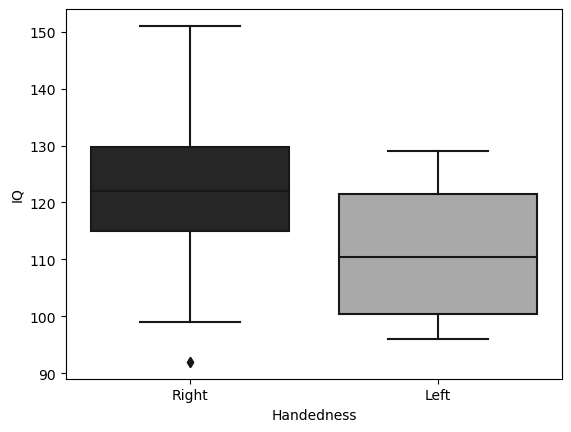

In [17]:
g = sns.boxplot(data=subjects, x="Handedness", y="IQ", palette = "dark:darkgray")

One advantage of the boxplot is that readers familiar with the conventions
guiding its design will be able to glean a wealth of information about the data
simply by glancing at the rather economical set of markings in this plot. On the
other hand, as with the violinplot, it does not communicate some aspects of the
data. For example, the discrepancy in sample size between the left-handed and
right-handed sample.

Statistical visualization can accompany even more elaborate statistical analysis
than just the distribution of the data. For example, Seaborn includes
functionality to fit a linear model to the data. This is done using the `lmplot`
function. This function visualizes not only the scatter plot of the data (in the
following example, the scores in two sub-tests of the IQ test), but also a fit
of a linear regression line between the variables, and a shaded area that
signifies that 95% confidence interval derived from the model. In the example to
follow, we show that this functionality can be invoked to split up the data
based on another one of the columns in the data. In this case, the gender
column.

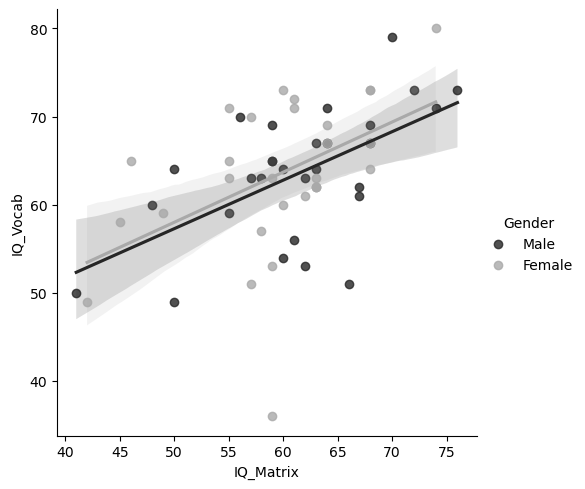

In [18]:
g = sns.lmplot(data=subjects, x="IQ_Matrix", y="IQ_Vocab", hue="Gender", palette = "dark:darkgray")

One of the strengths of Seaborn is that it produces images that are both
aesthetically pleasing and highly communicative. In most datasets, it can
produce the kinds of figures that you would include in a report or scientific
paper.

### Visualizing and exploring image data

Visualizations are a very effective tool for communicating about data, but
another one of the purposes of data visualization is to aid in the process of
research. For example, it is always a good idea to spend time looking at your
raw and processed data. This is because statistical summaries of data can be
misleading. For example, a single corrupted image with values much higher or
much lower than all of the other images in an MRI series may drive the mean
signal up or down substantially. And there are other ways in which you may be
misled if you don't take the time to look at the data closely. This means that
it is good to have at your fingertips different ways in which you can quickly
visualize some data and explore it. For example, we can use Matplotlib to
directly visualize a single slice from the mean of a BOLD fMRI time series:

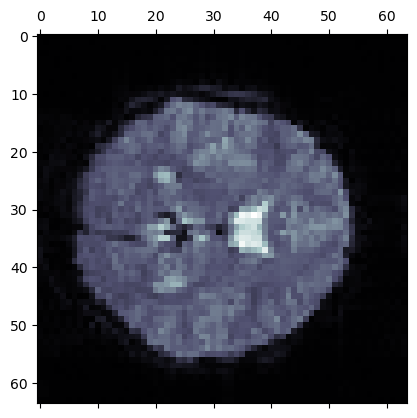

In [19]:
import numpy as np
from ndslib import load_data
bold = load_data("bold_numpy", fname="bold.npy")
bold.shape
fig, ax = plt.subplots()
im = ax.matshow(np.mean(bold, -1)[:, :, 10], cmap="bone")

#### Exercise

Use the code above to explore the BOLD time series in more detail. Can you create a figure where the 10th slice in every time point is displayed as part of a series of small multiples? How would you make sure that each image shows the same range of pixel values (hint: explore the keyword arguments of `matshow`).

*This tutorial was based on Chapter 10 of the [Neuroimaging and Data Science](https://neuroimaging-data-science.org/root.html) textbook.*